In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [6]:
bank = pd.read_csv(r'/content/drive/MyDrive/167956595705360ec2379f8793842aa5b168a_/ML Question Paper/Datasets/bank.csv',delimiter=";")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
'''
for i in bank.columns:
  print(bank[i].unique())
'''

'\nfor i in bank.columns:\n  print(bank[i].unique())\n'

In [12]:
bank.shape

(41188, 21)

In [13]:
bank.value_counts()

age  job          marital  education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
36   retired      married  unknown              no       no       no    telephone  jul    thu          88        1         999    0         nonexistent   1.4          93.918          -42.7          4.966      5228.1       no     2
39   blue-collar  married  basic.6y             no       no       no    telephone  may    thu          124       1         999    0         nonexistent   1.1          93.994          -36.4          4.855      5191.0       no     2
27   technician   single   professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
55   services     married  high.school          unknown  no       no    cellular 

<Axes: xlabel='y', ylabel='count'>

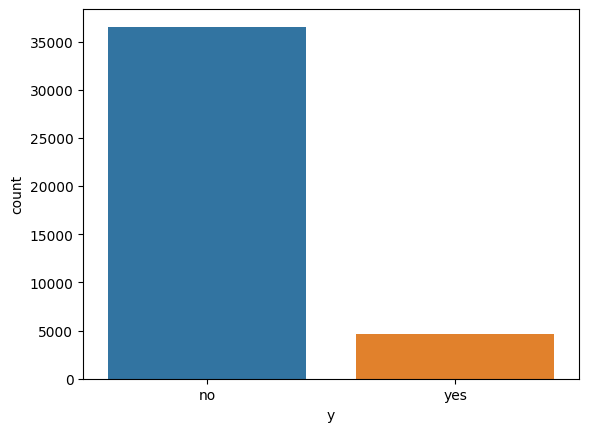

In [15]:
sns.countplot(bank,x = 'y')

We can see that the data is imbalanced

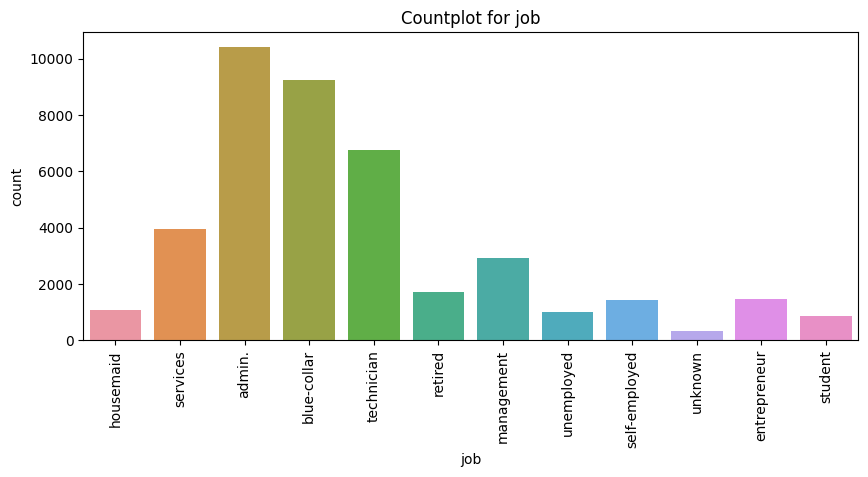

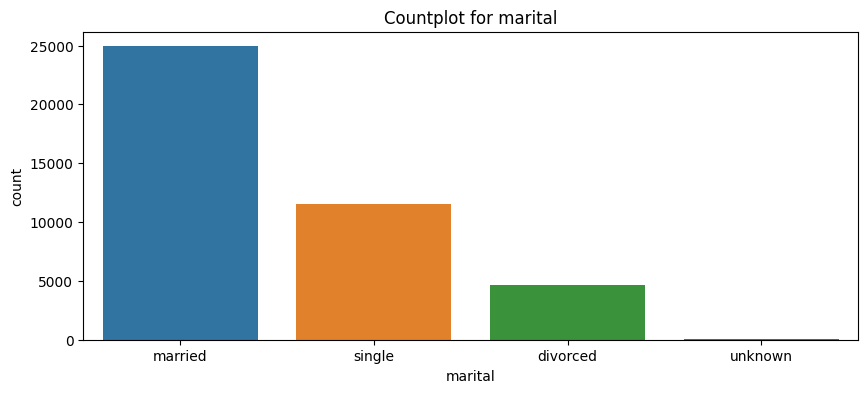

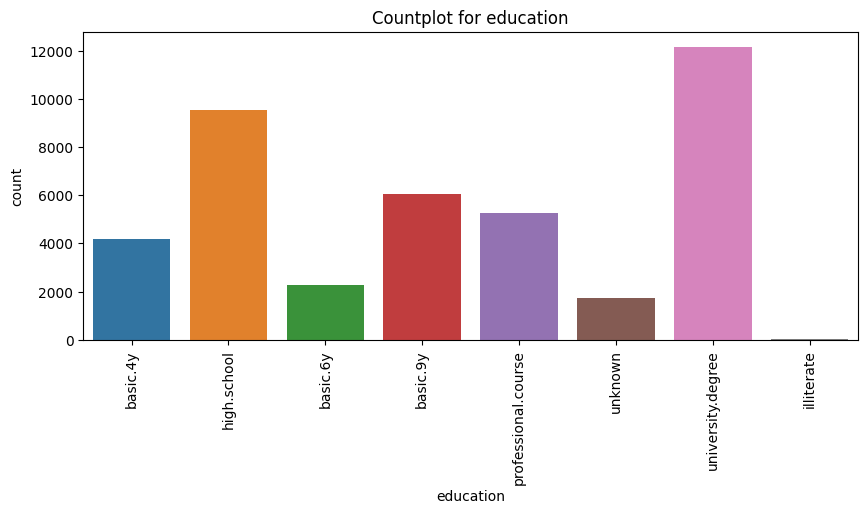

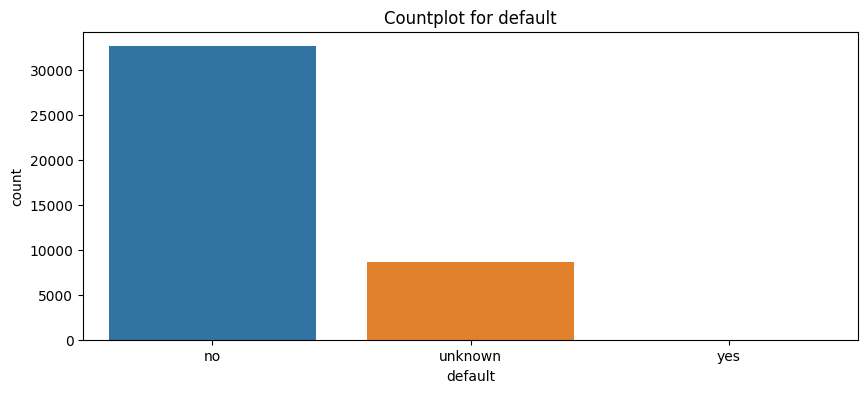

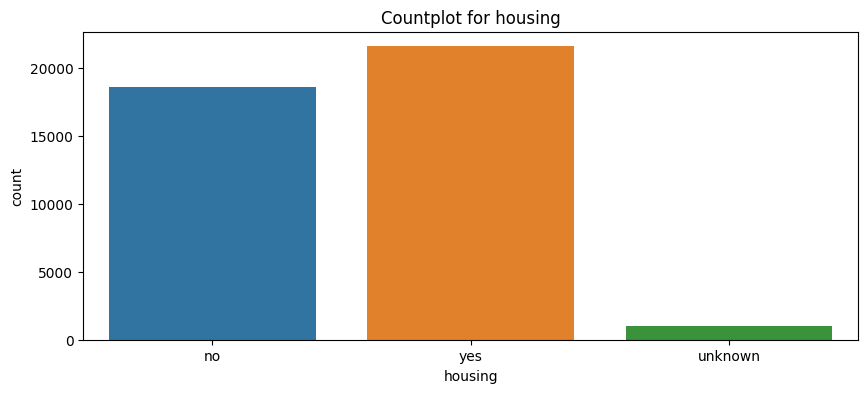

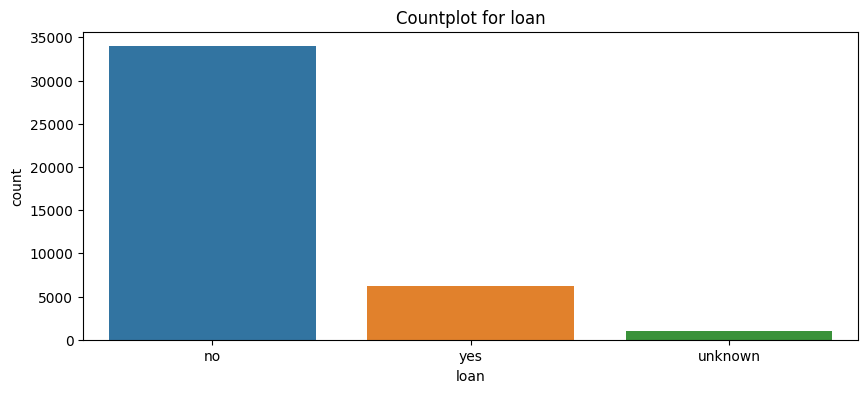

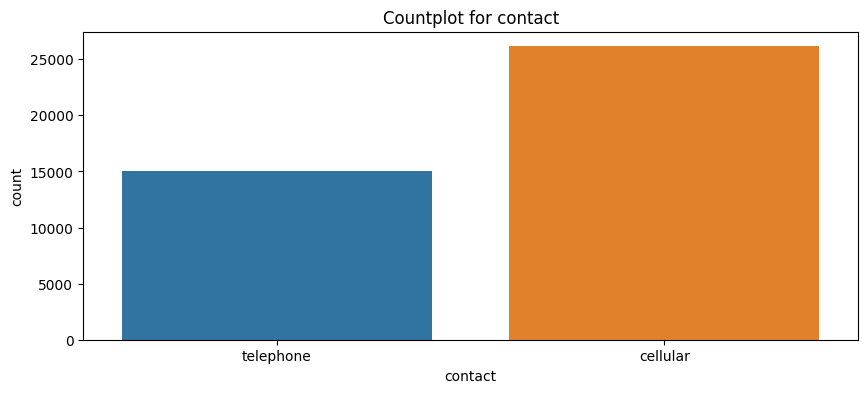

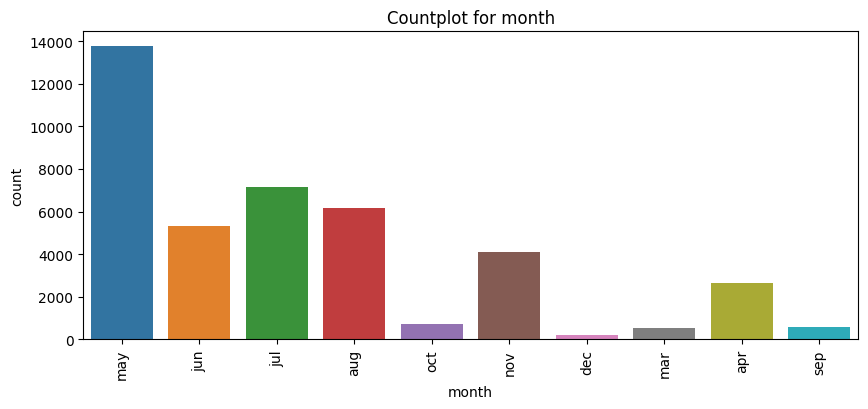

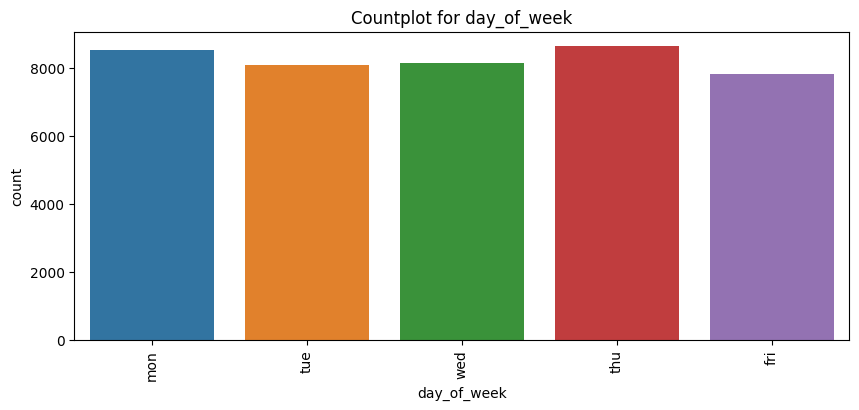

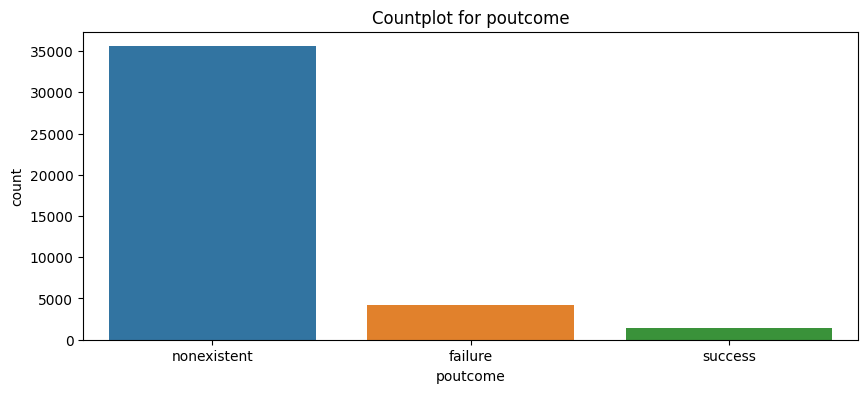

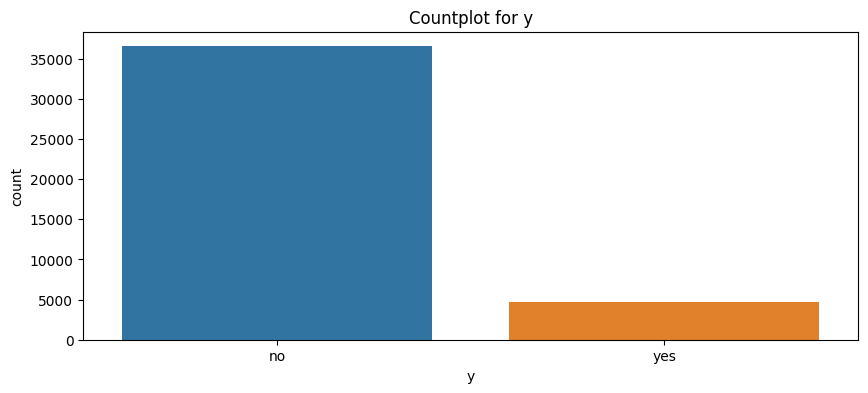

In [16]:
category = bank.select_dtypes(include="object").columns

for column in category:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=bank, x=column)
    plt.title(f"Countplot for {column}")
    if len(bank[column].unique()) > 4:
      rotation = 90
    else:
      rotation = 0
    plt.xticks(rotation= rotation)
    plt.show()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

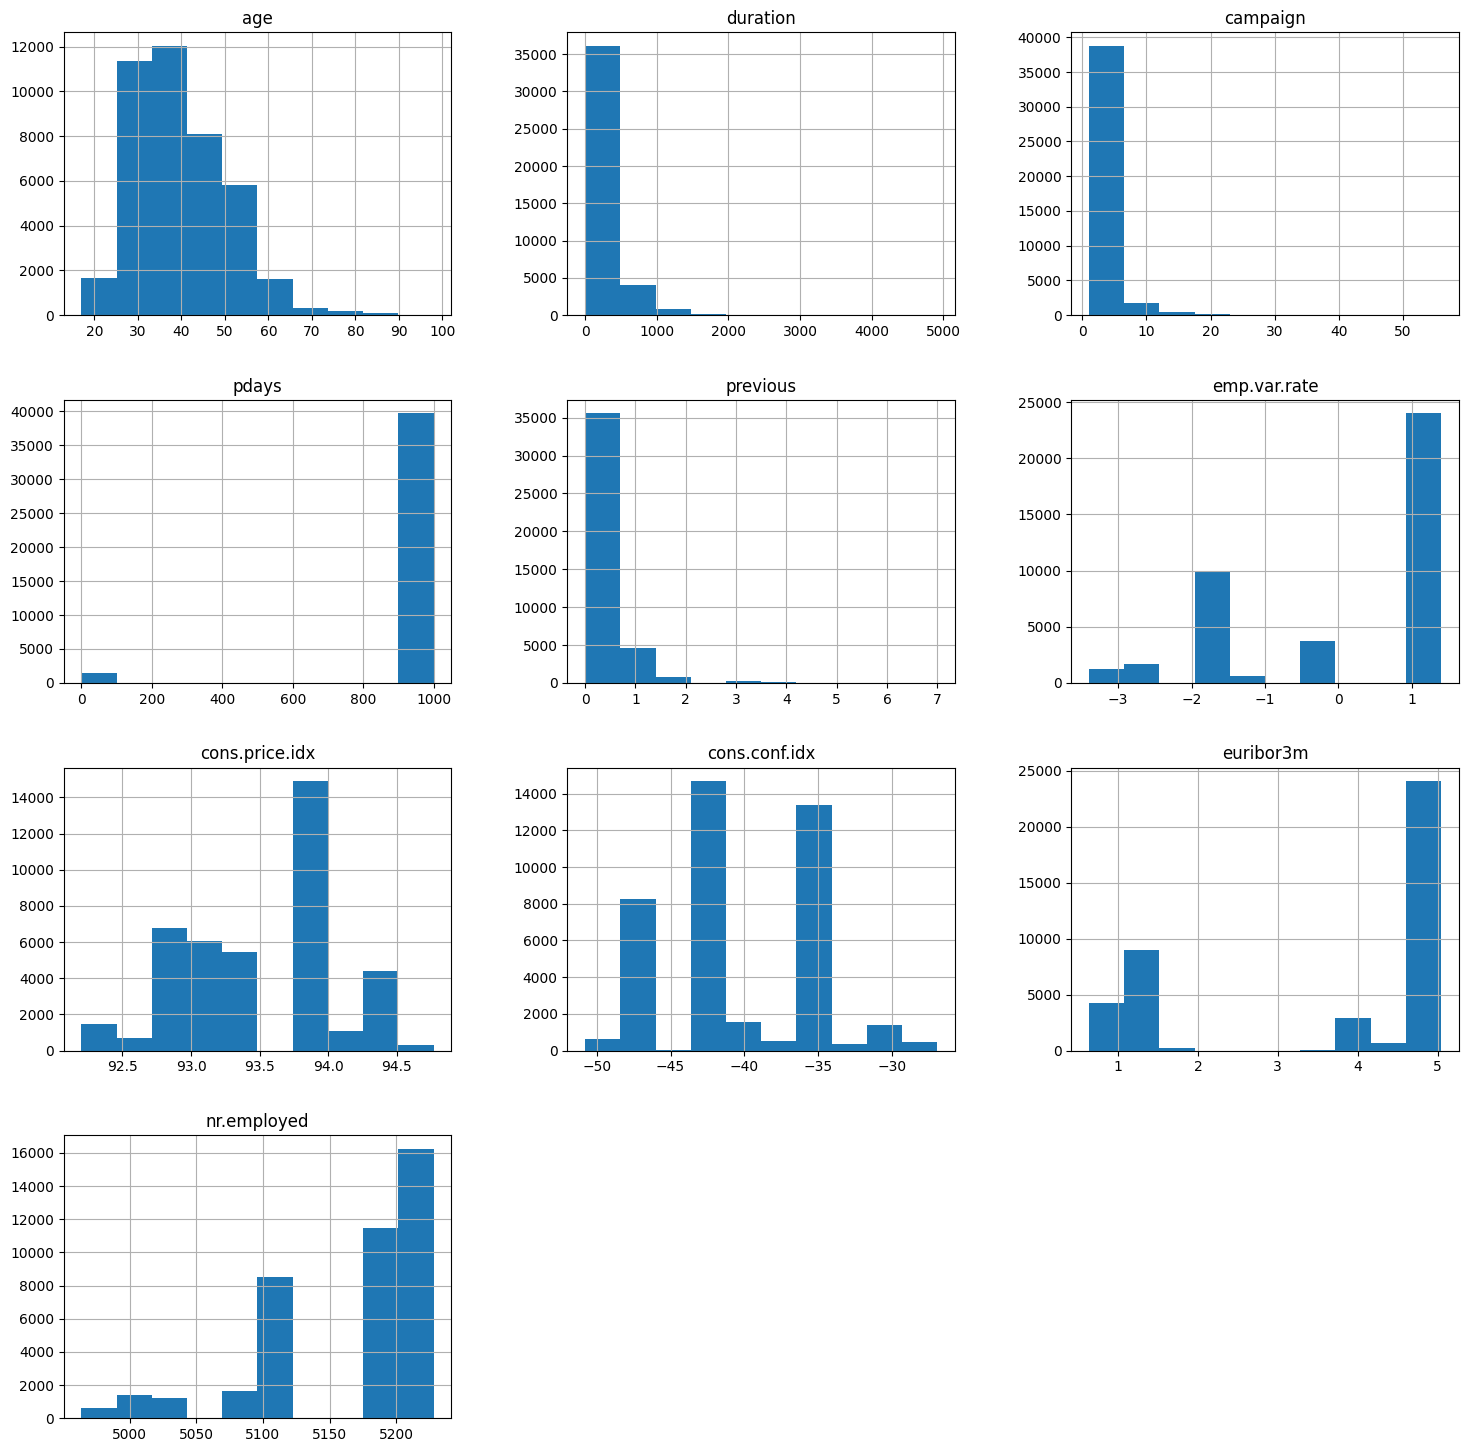

In [17]:
 bank.hist(figsize = (18,18))

Q.2. Perform the following pre-processing tasks:

a. Missing Value Analysis


In [33]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

b. Label Encoding wherever required

In [18]:
col = []
for x in bank.columns:
  if bank[x].dtypes == 'object':
    col.append(x)
col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [19]:
le = LabelEncoder()
for x in col:
  bank[x] = le.fit_transform(bank[x])

In [20]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [21]:
x = bank.values[:,0:-1]
y = bank.values[:,-1]

In [22]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

c. Selecting important features based on Random Forest

In [24]:
lr = LogisticRegression()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [25]:
models = [lr,dc,rf]

In [26]:
for model in models:
    model.fit(xtrain, ytrain) # fit the model
    y_pred= model.predict(xtest) # then predict on the test set
    accuracy= accuracy_score(ytest, y_pred)
    clf_report= classification_report(ytest, y_pred)
    print(confusion_matrix(ytest,y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[7107  203]
 [ 564  364]]
The accuracy of the  LogisticRegression  model is  90.68948773974266
Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7310
         1.0       0.64      0.39      0.49       928

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



[[6834  476]
 [ 428  500]]
The accuracy of the  DecisionTreeClassifier  model is  89.02646273367321
Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      7310
         1.0       0.51      0.54      0.53       928

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



[[7068  242]
 [ 465  463]]
The accuracy of the  RandomForestClassifier  model is  91.4178198591891

In [27]:
lr.score(xtrain,ytrain)

0.9117147192716236

In [28]:
print((list(zip(bank.columns[0:-1],rf.feature_importances_))))

[('age', 0.0899682131875538), ('job', 0.04833637837026414), ('marital', 0.023390356480377034), ('education', 0.04340589155537128), ('default', 0.008558865484033885), ('housing', 0.019943793441351065), ('loan', 0.014732206243005528), ('contact', 0.009544353176352535), ('month', 0.018888125358942576), ('day_of_week', 0.03952496190262702), ('duration', 0.31923627265790044), ('campaign', 0.04205978486266416), ('pdays', 0.02622263409792374), ('previous', 0.01288251739278624), ('poutcome', 0.03763020825375655), ('emp.var.rate', 0.019933071368247613), ('cons.price.idx', 0.02252503044423471), ('cons.conf.idx', 0.023238226576800268), ('euribor3m', 0.11001700897270274), ('nr.employed', 0.06996210017310474)]


As we can see 'default', 'contact', 'loan', 'previous', and 'marital' seem to have relatively low importance scores so i will drop them

In [29]:
drop = ['default', 'contact', 'loan', 'previous', 'marital']
bank.drop(columns=drop, axis=1)

,age,job,education,housing,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,6,1,261,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,3,0,6,1,149,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,3,2,6,1,226,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,6,1,151,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,3,0,6,1,307,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,2,7,0,334,1,999,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,5,0,7,0,383,1,999,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,6,2,7,0,189,2,999,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,5,0,7,0,442,1,999,1,-1.1,94.767,-50.8,1.028,4963.6,1


d. Handling unbalanced data  using SMOTE

Counter({0.0: 36548, 1.0: 4640})
Resampled class distribution: Counter({0.0: 36548, 1.0: 36548})


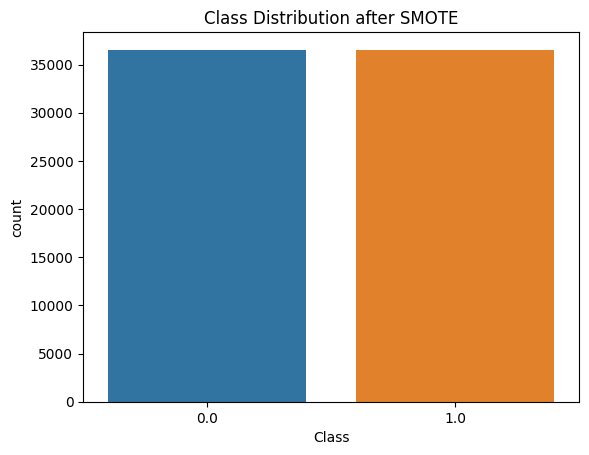

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)

oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)


resampled_counter = Counter(Y)
print("Resampled class distribution:", resampled_counter)

data = pd.DataFrame({'Class': Y})
sns.countplot(x='Class', data=data)
plt.title('Class Distribution after SMOTE')
plt.show()

e. Standardize the data using any one of the scalers provided by sklearn

In [31]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Q.3. Build the following Supervised Learning models:

a. Logistic Regression

b. Decision Trees

c. Random Forest


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cr=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/eexam/credit_card.csv',header=0)

Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [ ]:
cr.shape

(8950, 18)

In [ ]:
cr.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Q2. Perform the following Exploratory Data Analysis tasks:

a. Missing Value Analysis


In [ ]:
cr.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
for i in cr.columns:
  print({i:cr[i].unique()})

{'CUST_ID': array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)}
{'BALANCE': array([  40.900749, 3202.467416, 2495.148862, ...,   23.398673,
         13.457564,  372.708075])}
{'BALANCE_FREQUENCY': array([0.818182, 0.909091, 1.      , 0.636364, 0.545455, 0.875   ,
       0.454545, 0.727273, 0.5     , 0.888889, 0.090909, 0.272727,
       0.363636, 0.      , 0.666667, 0.75    , 0.857143, 0.181818,
       0.333333, 0.6     , 0.3     , 0.125   , 0.9     , 0.833333,
       0.8     , 0.2     , 0.777778, 0.555556, 0.25    , 0.142857,
       0.571429, 0.4     , 0.444444, 0.714286, 0.222222, 0.1     ,
       0.625   , 0.428571, 0.111111, 0.285714, 0.7     , 0.375   ,
       0.166667])}
{'PURCHASES': array([  95.4 ,    0.  ,  773.17, ...,  291.12,  144.4 , 1093.25])}
{'ONEOFF_PURCHASES': array([   0.  ,  773.17, 1499.  , ...,  734.4 , 1012.73, 1093.25])}
{'INSTALLMENTS_PURCHASES': array([  95.4 ,    0.  , 1333.28, ...,  113.28,  291.12,  144.4 ])}
{'CASH_

In [ ]:
cr = cr.dropna(subset=['CREDIT_LIMIT'])

In [ ]:
cr.fillna(cr['MINIMUM_PAYMENTS'].median() , inplace=True)

In [ ]:
cr.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

b. Outlier Treatment using the Z-score method

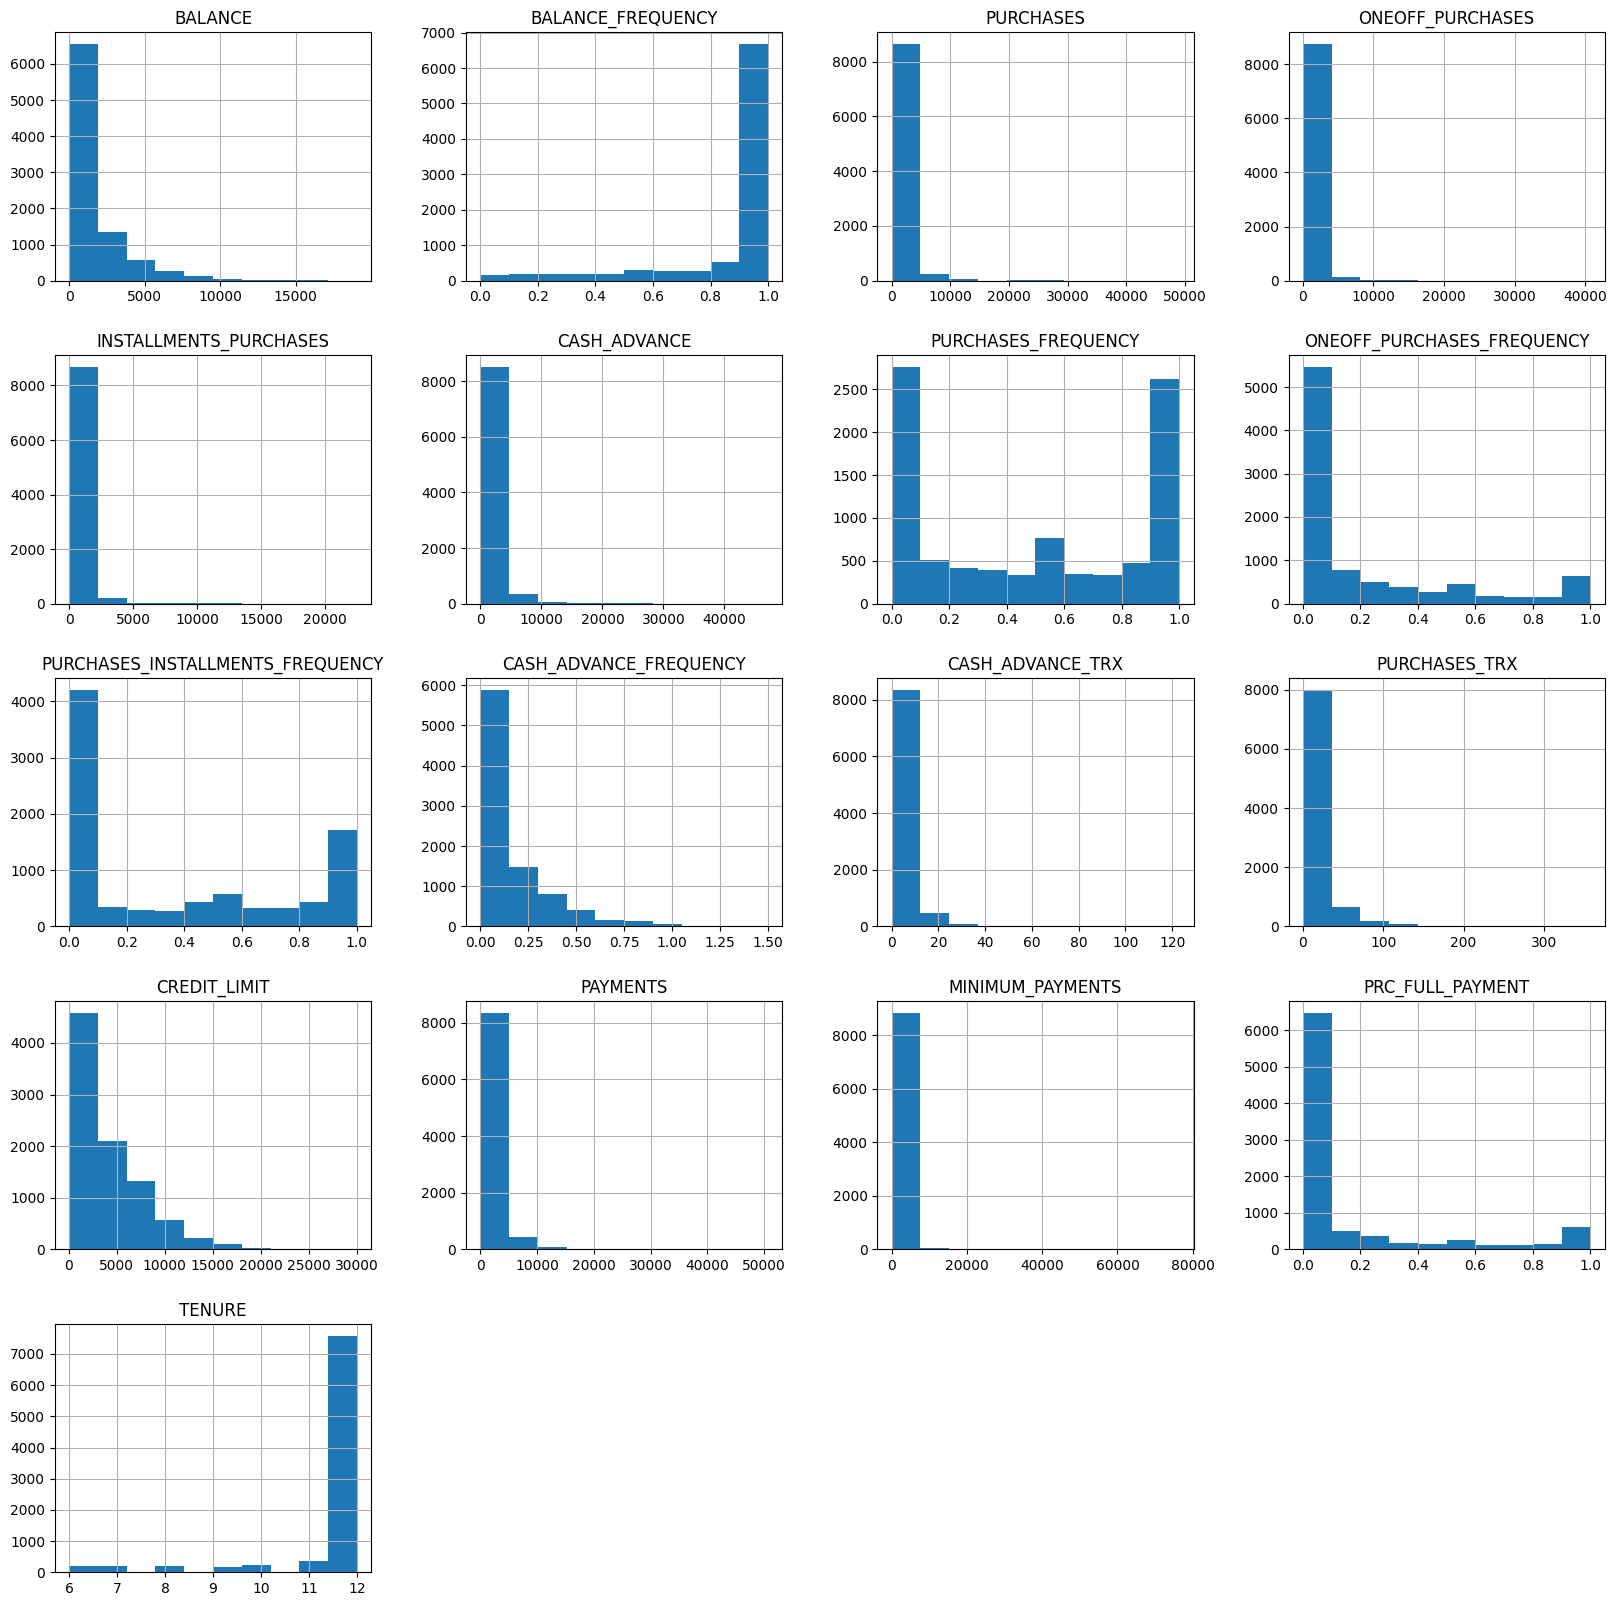

In [ ]:
fig = cr.hist(figsize=(20,20))

In [ ]:
from scipy import stats
cr=cr.drop(columns=['CUST_ID', 'TENURE'])
z_score = pd.DataFrame(np.abs(stats.zscore(cr)), columns=cr.columns)


z_score3=[]
over3_index=[]
for i in z_score.columns:
    indexs=z_score.index[z_score[i] > 3].tolist()
    ans=i, "{:.3f}".format(len(indexs)/len(z_score)), indexs
    z_score3.append(ans)
    if len(indexs)/len(z_score) > 0.02:
        over3_index.append(i)


del over3_index[0]
del over3_index[1]

for i in over3_index:
    cr['sqrt_%s' % i]=cr[i].apply(np.sqrt)

In [ ]:
credit = cr.drop(['BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX'], axis=1)

Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [ ]:
x=credit

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [ ]:
X = scaler.fit_transform(x)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
credit = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.75407456e-01 1.77690001e-01 1.40050226e-01 1.13493540e-01
 4.80964068e-02 2.72035830e-02 1.80573936e-02 7.19902691e-07
 5.87986906e-07 8.01235781e-08 2.26545609e-09 1.47516603e-09
 9.83982647e-10 6.78200010e-10 4.64929259e-10 1.63468163e-10]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_train_new = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.47540746 0.17769    0.14005023 0.11349354 0.04809641]


Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

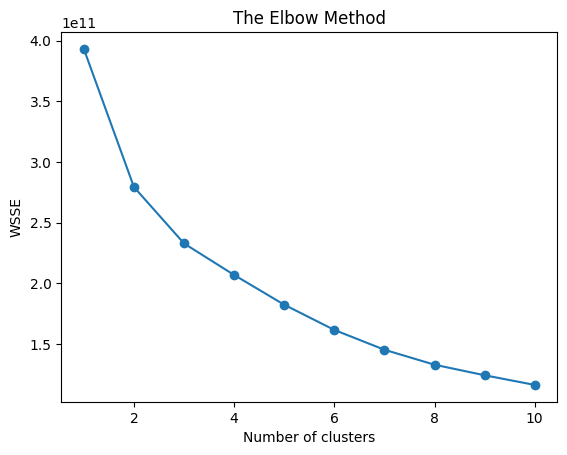

In [ ]:
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

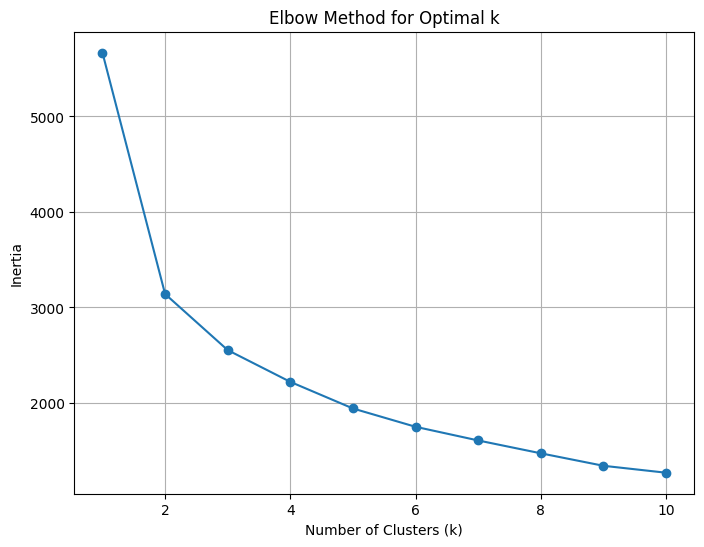

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
inertia = []


k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters = [2,3,4, 5,6,7,8]

for K in n_clusters :
    cluster = KMeans (n_clusters= 2, random_state= 10)
    predict = cluster.fit_predict(x)

    score = silhouette_score(x, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.5117410824734233)
For n_clusters = 3, silhouette score is 0.5117410824734233)
For n_clusters = 4, silhouette score is 0.5117410824734233)
For n_clusters = 5, silhouette score is 0.5117410824734233)
For n_clusters = 6, silhouette score is 0.5117410824734233)
For n_clusters = 7, silhouette score is 0.5117410824734233)
For n_clusters = 8, silhouette score is 0.5117410824734233)


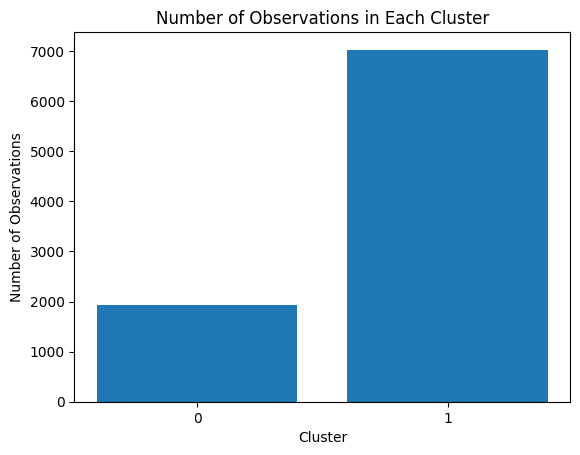

Optimal k: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np



# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Define a range of k values to test
k_values = range(2, 11)

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the k with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Build the K-means clustering model with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(x)

# Plot the number of observations in each cluster using a bar plot
unique, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Number of Observations in Each Cluster')
plt.show()

print(f'Optimal k: {optimal_k}')